Modelo Machine Learning - Default

In [3]:
!pip install statsmodels
!pip install sklearn
!pip install dask
!pip install tabulate
!pip install missingno dask
!pip install dask[dataframe]
!pip install ace_tools
!pip install scikit-optimize
!pip install pandas pyarrow
!pip install mglearn
!pip install statsmodels
!pip install imblearn
!pip install -U imbalanced-learn
!pip install bayesian-optimization


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:00


In [32]:
from google.colab import drive
drive.mount('/content/drive')
import time
import dask.dataframe as dd #Lectura de csv grandes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from tabulate import tabulate
from scipy.stats import shapiro
from scipy.stats import normaltest
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
import statsmodels.api as sm
import plotly.graph_objects as go
from sklearn.metrics import explained_variance_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, roc_curve)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from bayes_opt import BayesianOptimization
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import chi2_contingency
from scipy.stats import kstest

In [5]:
# Ruta donde guardaste los archivos en Google Drive
input_dir = '/content/drive/My Drive/'

# Cargar los archivos CSV en DataFrames de pandas
delinquency_imputed_pd = pd.read_csv(input_dir + 'delinquency_imputed_pd.csv')
balance_imputed_filtered = pd.read_csv(input_dir + 'balance_imputed_filtered.csv')
risk_imputed_filtered = pd.read_csv(input_dir + 'risk_imputed_filtered.csv')
spend_imputed_filtered = pd.read_csv(input_dir + 'spend_imputed_filtered.csv')
payment_imputed_filtered = pd.read_csv(input_dir + 'payment_imputed_filtered.csv')


In [7]:
# Concatenar los DataFrames
final_data = pd.concat([delinquency_imputed_pd, balance_imputed_filtered, risk_imputed_filtered,
                        spend_imputed_filtered, payment_imputed_filtered], axis=1)


print(tabulate(final_data.head(10), headers='keys', tablefmt='pretty'))

+---+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+------------------

In [13]:
print(final_data.columns.tolist())

['D_105', 'D_56', 'D_77', 'D_43', 'D_46', 'D_62', 'D_48', 'D_61', 'D_78', 'D_44', 'D_83', 'D_69', 'D_55', 'D_124', 'D_119', 'D_118', 'D_115', 'D_113', 'D_125', 'D_121', 'D_122', 'D_123', 'D_91', 'D_59', 'D_141', 'D_131', 'D_139', 'D_145', 'D_130', 'D_129', 'D_103', 'D_107', 'D_104', 'D_143', 'D_128', 'D_70', 'D_79', 'D_133', 'D_144', 'D_102', 'D_140', 'D_84', 'D_89', 'D_52', 'D_81', 'D_72', 'D_74', 'D_80', 'D_112', 'D_45', 'D_54', 'D_41', 'D_109', 'D_47', 'D_127', 'D_92', 'D_93', 'D_94', 'D_65', 'D_86', 'D_96', 'D_58', 'D_60', 'D_51', 'D_75', 'D_71', 'D_39', 'customer_ID', 'target', 'B_13', 'B_8', 'B_25', 'B_15', 'B_3', 'B_22', 'B_16', 'B_20', 'B_19', 'B_26', 'B_33', 'B_27', 'B_41', 'B_6', 'B_40', 'B_4', 'B_5', 'B_10', 'B_7', 'B_28', 'B_36', 'B_11', 'B_12', 'B_9', 'B_24', 'B_21', 'B_32', 'R_27', 'R_20', 'R_7', 'R_14', 'R_2', 'R_21', 'R_22', 'R_23', 'R_24', 'R_25', 'R_17', 'R_18', 'R_13', 'R_15', 'R_16', 'R_10', 'R_11', 'R_6', 'R_8', 'R_4', 'R_3', 'R_28', 'R_19', 'S_9', 'S_27', 'S_7', '

In [10]:
test = pd.read_feather(input_dir + 'test_data.ftr')

In [16]:
# Variables que deseas conservar en el DataFrame 'test'
columns_to_keep = [
    'D_105', 'D_56', 'D_77', 'D_43', 'D_46', 'D_62', 'D_48', 'D_61', 'D_78',
    'D_44', 'D_83', 'D_69', 'D_55', 'D_124', 'D_119', 'D_118', 'D_115', 'D_113',
    'D_125', 'D_121', 'D_122', 'D_123', 'D_91', 'D_59', 'D_141', 'D_131',
    'D_139', 'D_145', 'D_130', 'D_129', 'D_103', 'D_107', 'D_104', 'D_143',
    'D_128', 'D_70', 'D_79', 'D_133', 'D_144', 'D_102', 'D_140', 'D_84',
    'D_89', 'D_52', 'D_81', 'D_72', 'D_74', 'D_80', 'D_112', 'D_45', 'D_54',
    'D_41', 'D_109', 'D_47', 'D_127', 'D_92', 'D_93', 'D_94', 'D_65', 'D_86',
    'D_96', 'D_58', 'D_60', 'D_51', 'D_75', 'D_71', 'D_39', 'customer_ID',
    'target', 'B_13', 'B_8', 'B_25', 'B_15', 'B_3', 'B_22', 'B_16', 'B_20',
    'B_19', 'B_26', 'B_33', 'B_27', 'B_41', 'B_6', 'B_40', 'B_4', 'B_5',
    'B_10', 'B_7', 'B_28', 'B_36', 'B_11', 'B_12', 'B_9', 'B_24', 'B_21',
    'B_32', 'R_27', 'R_20', 'R_7', 'R_14', 'R_2', 'R_21', 'R_22', 'R_23',
    'R_24', 'R_25', 'R_17', 'R_18', 'R_13', 'R_15', 'R_16', 'R_10', 'R_11',
    'R_6', 'R_8', 'R_4', 'R_3', 'R_28', 'R_19', 'S_9', 'S_27', 'S_7', 'S_24',
    'S_26', 'S_23', 'S_5', 'S_15', 'S_18', 'S_11', 'S_16', 'S_17', 'S_6',
    'S_12', 'S_8', 'S_13', 'S_19', 'S_20', 'P_3', 'P_2', 'P_4'
]

# Filtrar el DataFrame para conservar solo las columnas deseadas
test = final_data[columns_to_keep]

In [19]:
# Acomodar 'customer_ID' como la primera columna
cols = list(test.columns)
if 'customer_ID' in cols:
    cols.remove('customer_ID')
    cols = ['customer_ID'] + cols
    test = test[cols]
else:
    print("La columna 'customer_ID' no se encuentra en el conjunto de datos.")

In [20]:
print(tabulate(test.head(10), headers='keys', tablefmt='pretty'))

+---+------------------------------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------

In [21]:
if 'target' in test.columns:
    y = test['target']
    X = test.drop(columns=['target', 'customer_ID'])
else:
    raise ValueError("La columna 'target' no se encuentra en el conjunto de datos.")


### Codificación de variables categóricas

In [38]:
# Codificación de variables categóricas
categorical_vars = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Verificar qué variables categóricas están presentes en el DataFrame test
existing_categorical_vars = [var for var in categorical_vars if var in X.columns]

# Convertir las variables categóricas existentes a tipo 'category' (opcional)
X[existing_categorical_vars] = X[existing_categorical_vars].astype('category')

# Aplicar One-Hot Encoding a las variables categóricas existentes
X_encoded = pd.get_dummies(X, columns=existing_categorical_vars, drop_first=True)

# Verificar que todas las columnas sean numéricas
non_numeric_cols = X_encoded.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols) > 0:
    raise ValueError(f"Las siguientes columnas no son numéricas y deben ser codificadas: {non_numeric_cols.tolist()}")


In [39]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [27]:
# Codificación de variables categóricas
categorical_vars = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Verificar qué variables categóricas están presentes en el DataFrame test
existing_categorical_vars = [var for var in categorical_vars if var in test.columns]

# Convertir las variables categóricas existentes a tipo 'category' (opcional)
test[existing_categorical_vars] = test[existing_categorical_vars].astype('category')

In [28]:
# Aplicar One-Hot Encoding a las variables categóricas existentes
X_encoded = pd.get_dummies(test, columns=existing_categorical_vars, drop_first=True)
y = X_encoded['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y)

## Definición de métricas

In [34]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

# Definición de métricas personalizadas
def top_four_percent_captured(y_true, y_pred_proba):
    df = pd.DataFrame({'target': y_true, 'prediction': y_pred_proba})
    df = df.sort_values('prediction', ascending=False)
    df['weight'] = df['target'].apply(lambda x: 20 if x == 0 else 1)
    four_pct_cutoff = int(0.04 * df['weight'].sum())
    df['weight_cumsum'] = df['weight'].cumsum()
    df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
    D = (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
    return D

def weighted_gini(y_true, y_pred_proba):
    df = pd.DataFrame({'target': y_true, 'prediction': y_pred_proba})
    df = df.sort_values('prediction', ascending=False)
    df['weight'] = df['target'].apply(lambda x: 20 if x == 0 else 1)
    df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
    total_pos = (df['target'] * df['weight']).sum()
    df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
    df['lorentz'] = df['cum_pos_found'] / total_pos
    df['gini'] = (df['lorentz'] - df['random']) * df['weight']
    G = df['gini'].sum()
    return G

def normalized_weighted_gini(y_true, y_pred_proba):
    df = pd.DataFrame({'target': y_true, 'prediction': y_pred_proba})
    G = weighted_gini(y_true, y_pred_proba)
    G_max = weighted_gini(y_true, df['target'])
    return G / G_max

def defaultprob_metric(y_true, y_pred_proba):
    G = normalized_weighted_gini(y_true, y_pred_proba)
    D = top_four_percent_captured(y_true, y_pred_proba)
    M = 0.5 * (G + D)
    return M

# Funciones para visualización
def plot_confusion(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

def plot_roc_curve_custom(fpr, tpr, label):
    plt.plot(fpr, tpr, label=label)

## Exploración inicial de variable respuesta

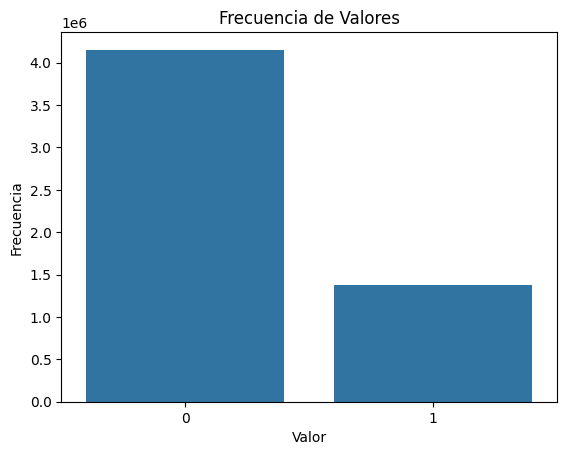

In [15]:
sns.countplot(x='target', data=final_data)
plt.title('Frecuencia de Valores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

## Modelo con ADASYN

In [ ]:
adasyn = ADASYN(random_state=42)
start_time_adasyn = time.time()
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
end_time_adasyn = time.time()
adasyn_time = end_time_adasyn - start_time_adasyn

print("Distribución de clases antes de ADASYN:")
print(y_train.value_counts())
print("\nDistribución de clases después de ADASYN:")
print(pd.Series(y_train_adasyn).value_counts())
print(f"\nTiempo de ejecución de ADASYN: {adasyn_time:.2f} segundos")

In [ ]:
# Inicializar diccionario para almacenar resultados
results_adasyn = {
    'Modelo': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'AUC': [],
    'M': [],
    'Tiempo_ejecucion(seg)': []
}

Clasificación bayesiana

In [ ]:
start_time_gnb = time.time()
gnb = GaussianNB()
gnb.fit(X_train_adasyn, y_train_adasyn)
end_time_gnb = time.time()
gnb_time = end_time_gnb - start_time_gnb

y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]
y_pred_gnb = gnb.predict(X_test)

In [ ]:
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
auc_gnb = roc_auc_score(y_test, y_pred_proba_gnb)
M_gnb = defaultprob_metric(y_test, y_pred_proba_gnb)

results_adasyn['Modelo'].append('Clasificación Bayesiana ADASYN')
results_adasyn['Precision'].append(precision_gnb)
results_adasyn['Recall'].append(recall_gnb)
results_adasyn['F1-Score'].append(f1_gnb)
results_adasyn['AUC'].append(auc_gnb)
results_adasyn['M'].append(M_gnb)
results_adasyn['Tiempo_ejecucion(seg)'].append(gnb_time)


Modelo K-NN

In [ ]:
start_time_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_adasyn, y_train_adasyn)
end_time_knn = time.time()
knn_time = end_time_knn - start_time_knn

y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = knn.predict(X_test)

In [ ]:
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
M_knn = defaultprob_metric(y_test, y_pred_proba_knn)

results_adasyn['Modelo'].append('K-NN ADASYN')
results_adasyn['Precision'].append(precision_knn)
results_adasyn['Recall'].append(recall_knn)
results_adasyn['F1-Score'].append(f1_knn)
results_adasyn['AUC'].append(auc_knn)
results_adasyn['M'].append(M_knn)
results_adasyn['Tiempo_ejecucion(seg)'].append(knn_time)

Logística L2

In [ ]:
start_time_lr_l2 = time.time()
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logreg_l2.fit(X_train_adasyn, y_train_adasyn)
end_time_lr_l2 = time.time()
lr_l2_time = end_time_lr_l2 - start_time_lr_l2

y_pred_proba_lr_l2 = logreg_l2.predict_proba(X_test)[:, 1]
y_pred_lr_l2 = logreg_l2.predict(X_test)

In [ ]:
precision_lr_l2 = precision_score(y_test, y_pred_lr_l2)
recall_lr_l2 = recall_score(y_test, y_pred_lr_l2)
f1_lr_l2 = f1_score(y_test, y_pred_lr_l2)
auc_lr_l2 = roc_auc_score(y_test, y_pred_proba_lr_l2)
M_lr_l2 = defaultprob_metric(y_test, y_pred_proba_lr_l2)

results_adasyn['Modelo'].append('Regresión Logística L2 ADASYN')
results_adasyn['Precision'].append(precision_lr_l2)
results_adasyn['Recall'].append(recall_lr_l2)
results_adasyn['F1-Score'].append(f1_lr_l2)
results_adasyn['AUC'].append(auc_lr_l2)
results_adasyn['M'].append(M_lr_l2)
results_adasyn['Tiempo_ejecucion(seg)'].append(lr_l2_time)

Logística L1

In [ ]:
start_time_lr_l1 = time.time()
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_l1.fit(X_train_adasyn, y_train_adasyn)
end_time_lr_l1 = time.time()
lr_l1_time = end_time_lr_l1 - start_time_lr_l1

y_pred_proba_lr_l1 = logreg_l1.predict_proba(X_test)[:, 1]
y_pred_lr_l1 = logreg_l1.predict(X_test)

In [ ]:
precision_lr_l1 = precision_score(y_test, y_pred_lr_l1)
recall_lr_l1 = recall_score(y_test, y_pred_lr_l1)
f1_lr_l1 = f1_score(y_test, y_pred_lr_l1)
auc_lr_l1 = roc_auc_score(y_test, y_pred_proba_lr_l1)
M_lr_l1 = defaultprob_metric(y_test, y_pred_proba_lr_l1)

results_adasyn['Modelo'].append('Regresión Logística L1 ADASYN')
results_adasyn['Precision'].append(precision_lr_l1)
results_adasyn['Recall'].append(recall_lr_l1)
results_adasyn['F1-Score'].append(f1_lr_l1)
results_adasyn['AUC'].append(auc_lr_l1)
results_adasyn['M'].append(M_lr_l1)
results_adasyn['Tiempo_ejecucion(seg)'].append(lr_l1_time)

## Modelamiento sin Adasyn